# Traduction en français du notebook *04* du cours ***Deep Learning*** d'Alfredo Canziani, professeur assistant à la *New York University*  :
https://github.com/Atcold/pytorch-Deep-Learning/blob/master/04-spiral_classification.ipynb

### Création des données

In [1]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
from IPython.display import clear_output

In [2]:
from res.plot_lib import plot_data, plot_model, set_default

In [3]:
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # nombre d'exemples par classe
D = 2  # dimensions
C = 3  # nombre de classes
H = 100  # nombre d'unités cachées

In [6]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # Quand c = 0 et t = 0 : début du .linspace
    # Quand c = 0 et t = 1 : fin du .linspace
    # Cette inner_var est pour la formule à l'intérieur de sin() et cos() comme sin(inner_var) et cos(inner_var)
    inner_var = torch.linspace(
        # Quand t = 0
        (2 * math.pi / C) * (c),
        # Quand t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Formes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Formes:
X: (3000, 2)
y: (3000,)


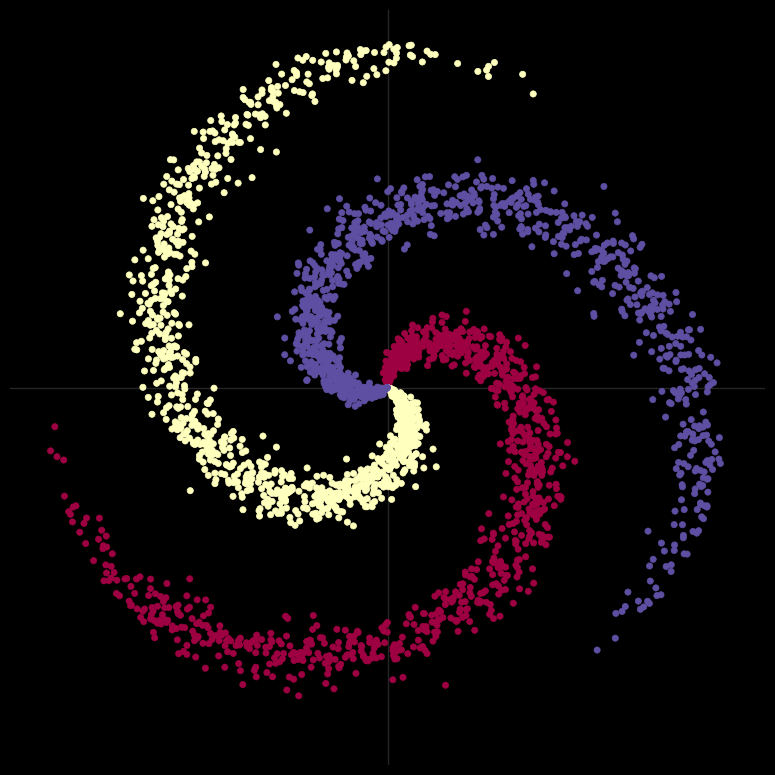

In [7]:
# Visualiser les données
plot_data(X, y)

### Modèle linéaire

In [8]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [9]:
# Utilisation du package nn pour créer notre modèle linéaire
# Chaque module linéaire a un poids et un biais
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device) # Conversion à CUDA

# Le package nn a également différentes fonctions de perte.
# nous utilisons la perte d'entropie croisée pour notre tâche de classification
criterion = torch.nn.CrossEntropyLoss()

# Nous utilisons le package optim pour appliquer la
# descente de gradient stochastique pour nos mises à jour des paramètres
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # L2

# Entraînement
for t in range(1000):
    
    # Passe avant pour obtenir les logits
    y_pred = model(X)
    
    # Calcule la perte (loss) et la précision (accuracy)
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # Mise à 0 des gradients avant la passe arrière 
    optimizer.zero_grad()
    
    # Passe arrière pour calculer le gradient de perte w.r.t de nos paramètres d'apprentissage
    loss.backward()
    
    # Mise à jour des paramètres
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.861541, [ACCURACY]: 0.504


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


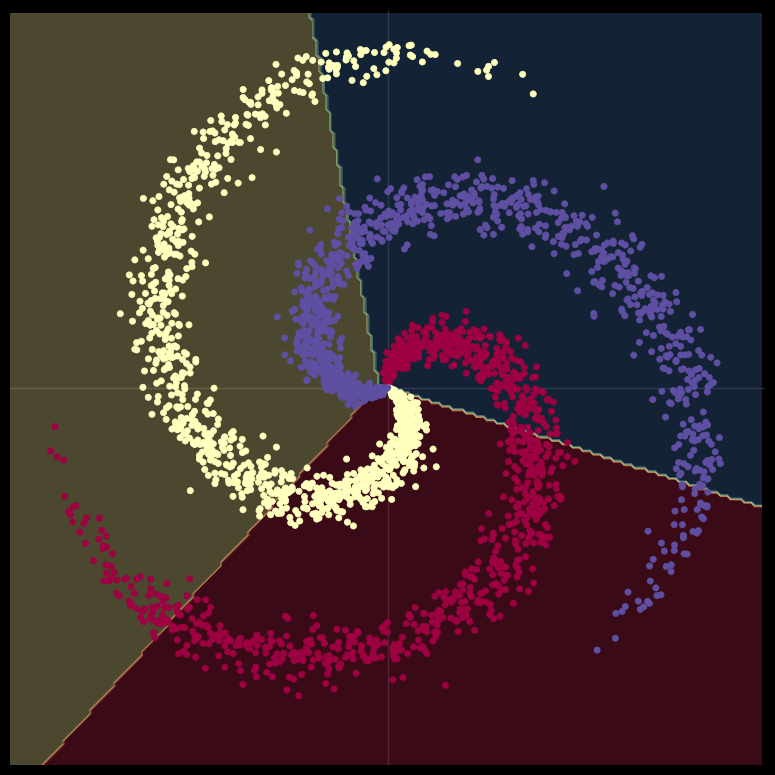

In [10]:
# Affichage du modèle entraîné
print(model)
plot_model(X, y, model)

### Réseau à deux couches

In [11]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [12]:
# Utilisation du package nn pour créer notre modèle linéaire
# Chaque module linéaire a un poids et un biais

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)


# Le package nn a également différentes fonctions de perte.
# nous utilisons la perte d'entropie croisée pour notre tâche de classification
criterion = torch.nn.CrossEntropyLoss()

# Nous utilisons le package optim pour appliquer ADAM pour la mise à jour des paramètres 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # L2

# e = 1.  # plotting purpose

# Entraînement
for t in range(1000):

    # Passe avant pour obtenir les logits
    y_pred = model(X)
    
    # Calcule la perte (loss) et la précision (accuracy)
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # Mise à 0 des gradients avant la passe arrière 
    optimizer.zero_grad()
    
    # Passe arrière pour calculer le gradient de perte w.r.t de nos paramètres d'apprentissage
    loss.backward()
    
    # Mise à jour des paramètres
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.178408, [ACCURACY]: 0.949


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


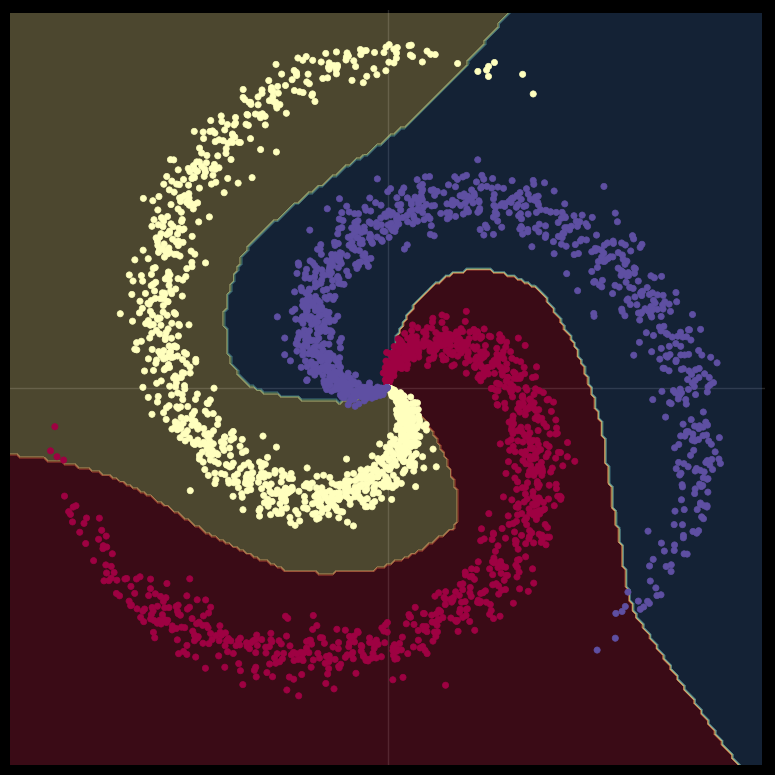

In [13]:
# Affichage du modèle entraîné
print(model)
plot_model(X, y, model)